In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('mumbai_house_prices.csv')
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [3]:
df.shape

(76038, 9)

In [4]:
df.groupby('type')['type'].count()

type
Apartment            74854
Independent House       73
Penthouse                3
Studio Apartment       882
Villa                  226
Name: type, dtype: int64

In [5]:
df['price_unit'].unique()

array(['Cr', 'L'], dtype=object)

In [6]:
# Normalize all prices to lakhs
df.loc[df['price_unit'] == 'Cr', 'price'] *= 100
df['price_unit'] = 'L'


In [7]:
df1 = df.drop(columns=['price_unit', 'locality', 'status', 'age'])
df1.head()

,bhk,type,area,price,region
0,3,Apartment,685,250.00,Andheri West
1,2,Apartment,640,52.51,Naigaon East
2,2,Apartment,610,173.00,Borivali West
3,2,Apartment,876,59.98,Panvel
4,2,Apartment,659,94.11,Mira Road East


In [8]:
df1.isnull().sum()

bhk       0
type      0
area      0
price     0
region    0
dtype: int64

In [9]:
df['bhk'].unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7])

In [10]:
df1['price_per_sqft'] = df1['price']*100000/df1['area']
df1.head()

,bhk,type,area,price,region,price_per_sqft
0,3,Apartment,685,250.00,Andheri West,36496.350365
1,2,Apartment,640,52.51,Naigaon East,8204.687500
2,2,Apartment,610,173.00,Borivali West,28360.655738
3,2,Apartment,876,59.98,Panvel,6847.031963
4,2,Apartment,659,94.11,Mira Road East,14280.728376


In [11]:
len(df['region'].unique())

228

In [12]:
df1.region = df1.region.apply(lambda x: x.strip())

region_stats = df1.groupby('region')['region'].count().sort_values(ascending=False)
region_stats

region
Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Uttan                  1
Warai                  1
mumbai                 1
sector                 1
vile parle west        1
Name: region, Length: 228, dtype: int64

In [13]:
len(region_stats[region_stats<10])

110

In [14]:
regions_less_than_10 = region_stats[region_stats<10]
regions_less_than_10

region
kasaradavali thane west    9
Maneklal Estate            9
Dahisar West               9
Cuffe Parade               9
Rabale                     8
                          ..
Uttan                      1
Warai                      1
mumbai                     1
sector                     1
vile parle west            1
Name: region, Length: 110, dtype: int64

In [15]:
df1.region = df1.region.apply(lambda x : 'other' if x in regions_less_than_10 else x)

In [16]:
len(df1.region.unique())

119

In [17]:
# detecting outliers

In [18]:
df1.head(20)

,bhk,type,area,price,region,price_per_sqft
0,3,Apartment,685,250.00,Andheri West,36496.350365
1,2,Apartment,640,52.51,Naigaon East,8204.687500
2,2,Apartment,610,173.00,Borivali West,28360.655738
3,2,Apartment,876,59.98,Panvel,6847.031963
4,2,Apartment,659,94.11,Mira Road East,14280.728376
5,2,Apartment,826,330.00,Parel,39951.573850
6,5,Villa,2921,199.00,Boisar,6812.735365
7,3,Apartment,778,289.00,Santacruz East,37146.529563
8,1,Apartment,396,29.84,Badlapur East,7535.353535
9,2,Apartment,671,272.00,other,40536.512668


In [19]:
df1[df1['area']/df1['bhk'] < 200]

,bhk,type,area,price,region,price_per_sqft
13957,1,Studio Apartment,183,48.60,Thane West,26557.377049
15784,2,Apartment,366,50.00,Vasai,13661.202186
15785,2,Apartment,366,50.00,Vasai,13661.202186
15788,2,Apartment,366,50.00,Vasai,13661.202186
15789,2,Apartment,366,50.00,Vasai,13661.202186
...,...,...,...,...,...,...
74237,1,Apartment,178,9.24,Palghar,5191.011236
74348,1,Studio Apartment,171,17.00,Nala Sopara,9941.520468
74349,1,Apartment,167,20.50,Nala Sopara,12275.449102
74350,1,Studio Apartment,174,17.50,Nala Sopara,10057.471264


In [20]:
df1.shape

(76038, 6)

In [21]:
df2 = df1[~(df1['area']/df['bhk'] < 200)]
df2.shape

(75968, 6)

In [22]:
df2.price_per_sqft.describe()

count     75968.000000
mean      15113.885273
std        9327.774804
min         646.766169
25%        8571.428571
50%       12992.773518
75%       19485.855336
max      182307.692308
Name: price_per_sqft, dtype: float64

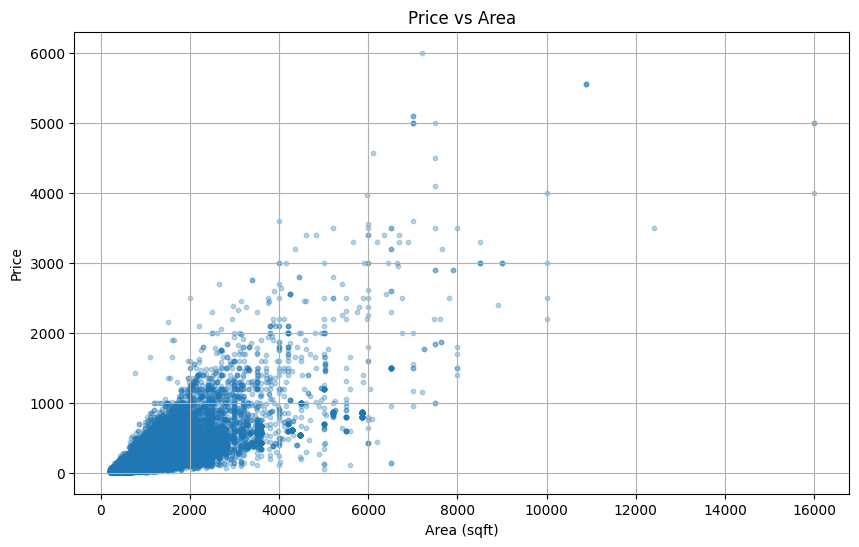

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df2['area'], df2['price'], alpha=0.3, s=10) 
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.grid(True)
plt.show()


In [24]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('region'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [25]:
df3 = remove_pps_outliers(df2)
df3

,bhk,type,area,price,region,price_per_sqft
0,2,Apartment,650,262.0,Agripada,40307.692308
1,1,Apartment,803,225.0,Agripada,28019.925280
2,1,Apartment,684,170.0,Agripada,24853.801170
3,1,Apartment,545,160.0,Agripada,29357.798165
4,2,Apartment,1650,350.0,Agripada,21212.121212
...,...,...,...,...,...,...
57104,1,Apartment,430,70.0,other,16279.069767
57105,1,Apartment,430,70.0,other,16279.069767
57106,1,Apartment,600,14.5,other,2416.666667
57107,2,Apartment,675,50.0,other,7407.407407


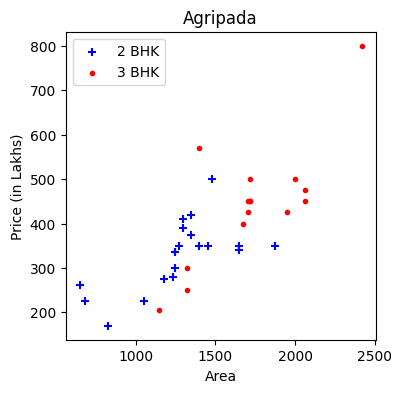

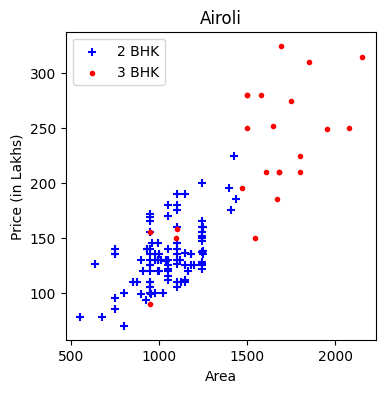

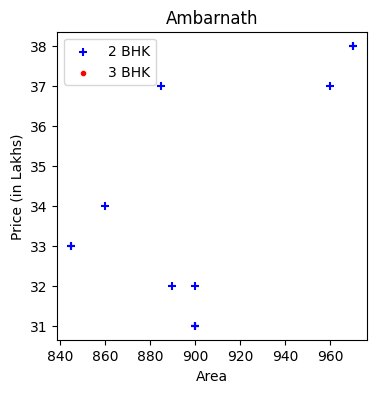

In [26]:
def plot_scatter_chart(df, region):
    bhk2 = df[(df.region == region) & (df.bhk==2)]
    bhk3 = df[(df.region == region) & (df.bhk==3)]

    plt.figure(figsize=(4,4))
    plt.scatter(bhk2.area, bhk2.price, color='blue', label='2 BHK', marker='+')
    plt.scatter(bhk3.area, bhk3.price, color='red', label='3 BHK', marker='.')
    plt.legend()
    plt.xlabel('Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(region)
    plt.show()

plotted = 2
for r in df3.region.unique():
    if plotted < 0:
        break;
    plot_scatter_chart(df3, r)
    plotted -= 1

In [27]:
df3

,bhk,type,area,price,region,price_per_sqft
0,2,Apartment,650,262.0,Agripada,40307.692308
1,1,Apartment,803,225.0,Agripada,28019.925280
2,1,Apartment,684,170.0,Agripada,24853.801170
3,1,Apartment,545,160.0,Agripada,29357.798165
4,2,Apartment,1650,350.0,Agripada,21212.121212
...,...,...,...,...,...,...
57104,1,Apartment,430,70.0,other,16279.069767
57105,1,Apartment,430,70.0,other,16279.069767
57106,1,Apartment,600,14.5,other,2416.666667
57107,2,Apartment,675,50.0,other,7407.407407


Text(0, 0.5, 'Count')

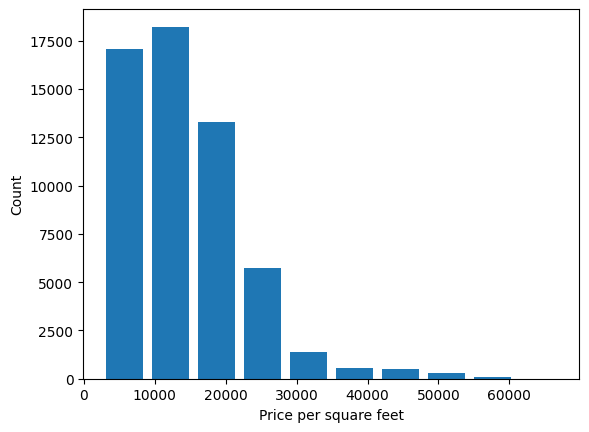

In [28]:
plt.hist(df3.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')


In [29]:
#  model building

In [30]:
df4 = pd.get_dummies(df3, columns=['region', 'type'], dtype='int')
df4

,bhk,area,price,price_per_sqft,region_Agripada,region_Airoli,region_Ambarnath,region_Ambernath East,region_Ambernath West,region_Andheri East,...,region_Virar,region_Virar West,region_Wadala,region_Worli,region_other,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa
0,2,650,262.0,40307.692308,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,803,225.0,28019.925280,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,684,170.0,24853.801170,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,545,160.0,29357.798165,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,1650,350.0,21212.121212,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57104,1,430,70.0,16279.069767,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
57105,1,430,70.0,16279.069767,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
57106,1,600,14.5,2416.666667,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
57107,2,675,50.0,7407.407407,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [135]:
X = df4.drop(columns=['price', 'price_per_sqft'])
y = df4.price

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [137]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8685822789479594

In [138]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [139]:
# k fold cross validation
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85695695, 0.83563928, 0.86373865, 0.86082284, 0.86010766])

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [141]:
def find_best_model_using_gridsearchcv(X, y):
    algos= {
        'linear-regression' : {
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['squared_error', 'friedman_mse'],
                'splitter':['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [142]:
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear-regression,0.855453,{'fit_intercept': True}
1,lasso,0.690344,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.925216,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [143]:
model = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [144]:
np.where(X.columns == 'type_Apartment')[0][0]

np.int64(121)

In [145]:
def predict_price(bhk, type, area, region):
    x = np.zeros(len(X.columns))

    # Set bhk and area by column name to avoid column order issues
    x[0] = bhk
    x[1] = area

    # Set one-hot encoded region and type
    region_col = 'region_' + region
    type_col = 'type_' + type
    if region_col in X.columns:
        x[X.columns.get_loc(region_col)] = 1
    if type_col in X.columns:
        x[X.columns.get_loc(type_col)] = 1

    # Predict using the model with proper feature names
    return model.predict(pd.DataFrame([x], columns=X.columns))[0]


In [155]:
predict_price(2, 'Penthouse', 2000, 'Tardeo')

np.float64(950.0)

In [153]:
predict_price(2, 'Apartment', 1000, 'Vikhroli')

np.float64(227.99999999999997)

area                        6.557025e-01
bhk                         1.008493e-01
region_Thane West           3.775923e-02
region_Kharghar             1.766057e-02
region_Bandra West          1.398077e-02
                                ...     
region_Kalwa                1.656598e-05
region_Nahur East           1.001654e-05
type_Studio Apartment       4.684918e-06
region_Sector 20 Kamothe    2.338429e-06
type_Penthouse              7.546036e-08
Length: 126, dtype: float64


In [157]:
import pickle
with open('mumbai_home_prices_model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [159]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))